In [1]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('lotto_all_balls.csv')
X = dataset.iloc[:, :].values
# y = dataset.iloc[:, -1].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)


/Users/pankajmathur/anaconda/envs/keras-playground/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [15]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 20, y = 20, input_len = 7, sigma = 1.0, learning_rate = 0.25)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

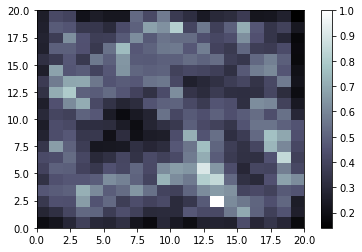

In [16]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
#          markers[y[i]],
#          markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [17]:

# Finding the outiers
mappings = som.win_map(X)
# outliers = np.concatenate((mappings[(0,2)]), axis = 0)
outliers = mappings[(13,2)]
outliers = sc.inverse_transform(outliers)
pd_outliers = pd.DataFrame(outliers)
pd_outliers.head(1000)

,0,1,2,3,4,5,6
0,4.0,10.0,11.0,18.0,25.0,28.0,27.0
1,9.0,12.0,14.0,17.0,26.0,28.0,43.0


In [14]:

# Finding the most_common
mappings = som.win_map(X)
# outliers = np.concatenate((mappings[(0,2)]), axis = 0)
most_common = mappings[(0,9)]
# outliers = np.concatenate((mappings[(0,9)], mappings[(9,0)]), axis = 0)
most_common = sc.inverse_transform(most_common)
pd_most_common = pd.DataFrame(most_common)
pd_most_common.head(1000)

,0,1,2,3,4,5,6
0,18.0,19.0,25.0,42.0,52.0,56.0,29.0
1,17.0,19.0,29.0,37.0,40.0,50.0,23.0
2,21.0,27.0,28.0,52.0,56.0,57.0,39.0
3,13.0,23.0,29.0,30.0,43.0,47.0,25.0
4,19.0,27.0,36.0,45.0,53.0,55.0,30.0
5,20.0,28.0,37.0,40.0,52.0,53.0,32.0
6,24.0,25.0,27.0,42.0,46.0,57.0,28.0
7,20.0,27.0,29.0,50.0,53.0,59.0,26.0
8,15.0,23.0,32.0,41.0,46.0,51.0,29.0
9,19.0,29.0,35.0,42.0,49.0,59.0,30.0
